# Pendulum

Welcome to the Jupyter Notebook of Lecture 4. We will here apply the method outlined in the lecture to solve a second order differential equation by using a finite difference method. 






A swinging pendulum is merely a system of forces that forms a second-order, ordinary differential equation when using the small-angle approximation. We start here by neglecting the effects of friction (and forcing), such that we have a basic pendulum purely under the force of gravity. 

Splitting the second-order equations into two, first-order equations, we derived the equations of motion for a swinging pendulum as:

$\frac{d \theta}{dt}  =  \omega $ 

$\frac{d \omega}{dt}  = -\frac{g}{l} sin( \theta ) $ 

where $\theta$
 is the angle the pendulum has rotated in radians (its position), $\omega$
 is the rotation rate in rad sec (its angular velocity), $g$
 is the gravitational acceleration in m sec, and $l$ 
 is the length of the pendulum in meters. 
 
Employing the Taylor's method (or also called forward Euler's method),
we derive in the lecture a simple discretization approach to decouple
the second order equation, and propagate (from a known initial condition)
a numerical approximation of the solution:

$\theta_{n+1} = \theta_n + \Delta t ( \frac{d \theta_n}{dt} ) $

$\omega_{n+1} = \omega_n + \Delta t ( \frac{d \omega_n}{dt} ) $









Question: find the derivatives $\frac{d \theta_n}{dt}$ and $\frac{d \omega_n}{dt}$ for the pendulum 

Recall that the Taylor's method will require some care with periodic functions, such as the pendulum oscillations, as numerical noise will accumulate with the time evolution. This requires a small timestep. 

We will also consider in this notebook a semi-implicit algorithm, obtained by a simple modification of the method (the Cromer method):

$\omega_{n+1} = \omega_n + \Delta t ( \frac{d \omega_n}{dt} ) $


$\theta_{n+1} = \theta_n + \Delta t ( \frac{d \theta_{n+1}}{dt} ) $





Question: Explain the difference between the Cromer's and Taylor's approaches.



### Exercice 1: The pendulum motion

In this exercise, you will use the this Jupyter Notebook to experiment with various model parameters and settings. You should understand the code and how it works. Notice that it is organized into distinct sections: preamble, parameter declaration, and model code. This provides a good coding practice, as to streamline your program. 

Here we define the code for our model in the lecture. This is primarily composed of a single function, which we will call pendulum. We must:

1) Load any modules required

2) Define any fixed Parameters that would not change.

3) Define a list of arguments that can be specified by the user. We must set default values for these parameters.

4) Define a list of initial conditions for our model. We must also specify these in the calling arguments so that the user can change them. We must set default values for these parameters.

5) Write documentation for our function that describes what it does and what the arguments are.

6) Create the structures that are required for our model to run

7) Set the initial conditions

8) Set the boundary conditions (if any)

9) Integrate our model, with ideally a choice of the Taylor's approach, or the small
modification provided by the Cromer's approach


We start by importing the relevant modules.


In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

### Parameters

The acceleration of gravity, g [m s−2]

The start time of the simulation, tstart [s]

The end time of the simulation, tend [s]

In [7]:
g=9.81
tstart=0
tend=10

### Model

Implement both explicit and semi-implicit integration of a simple pendulum.


Inputs: 

- l      : length of moment arm in m [0.5]
- dt     : time-step of integration in s [0.05]
- cromer : [True/False] use Taylor [False] or Cromer (True)
- omega0 : Initial angle of pendulum in rad [0]
- theta0 : Initial angular velocity of pendulum in rad/s [pi/6]


Outputs: 

- times : array of times in s
- theta : array of angles in rad
- omega : array of angular velocities in rad/s



### The Pendulum function

We now define the Python function, with the inputs and outputs outlined above. This
function will act as the differential equation "solver" for the pendulum.

Note that in Python, the inputs are declared in the first line of the function "def pendulum ( arguments ). 

Values specified in the function declaration act as default values. For example, in the function below, 0.5 is the default length of the pendulum's arm. 

Outputs are declared in the scope of the function by the "return" statement. 



In [2]:
import numpy as np
def omegafunc():
    return(0)


def pen(l=0.5, dt=0.05, cromer=False, omega0=0, theta0=np.pi/6.0, dampen=0):

    # Create the variables to store our results
    times=np.arange(tstart, tend+dt, dt)  # Create the array of model times
    Nt=len(times)                         # Number of time-steps
    omega=np.zeros(Nt)                    # Create the array for our velocity with time
    theta=np.zeros(Nt)                    # Create the array for our angle with time
    truth=np.zeros(Nt)                    # Create the array for the true solution with time

    # Set our initial conditions
    omega[0]=omega0
    theta[0]=theta0
    truth[0]=theta0
    
    # Loop over all of our times and integrate the model
    for n in range(Nt-1):
        
        # Time-step the velocity
        omega[n+1]=omega[n] + dt*(-(g/l)*np.sin(theta[n])) - dampen * omega[n]
    
        # Time-step the angle. If we are using 'Taylor' or 'Cromer"
        if cromer:
            theta[n+1]=theta[n] + dt* (omega[n+1])
        else:
            theta[n+1]=theta[n] + dt* (omega[n])

    return times, theta, omega

### Solving the differential equation


Fill in the blanks in the pendulum solver. 

Using the default parameters, run the model and make three plots:

Time-series of $\theta$

Time-series of $\omega$

Phase-space plot of $\theta$ versus $\omega$




<IPython.core.display.Javascript object>


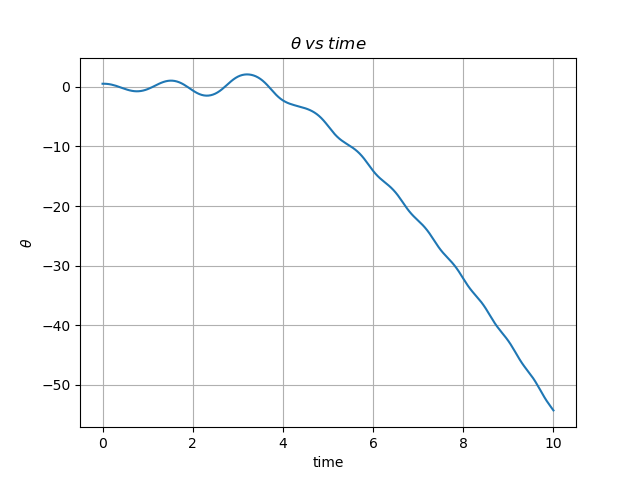

<IPython.core.display.Javascript object>


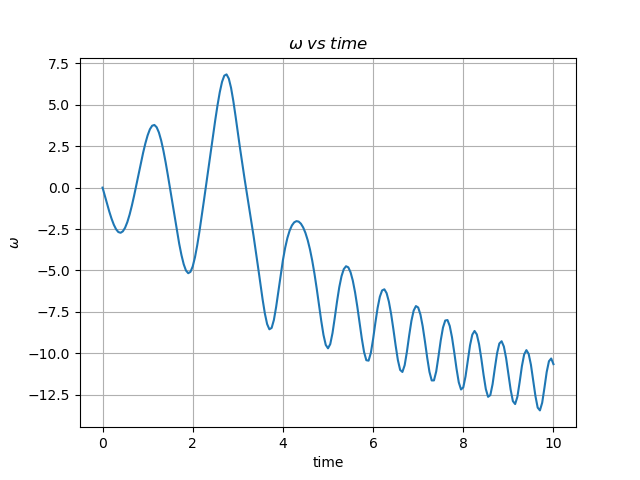

<IPython.core.display.Javascript object>


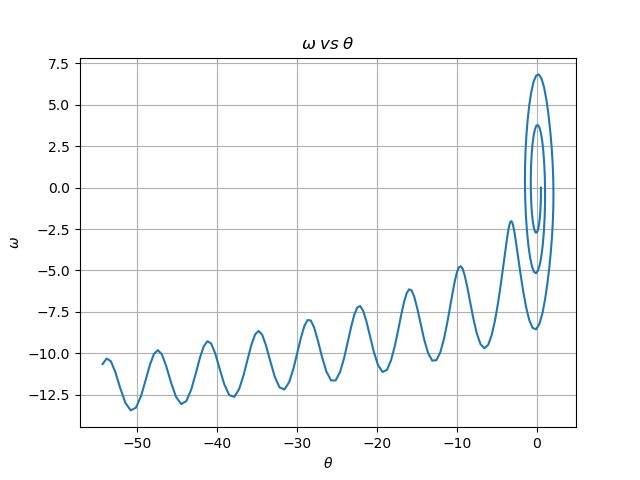

<IPython.core.display.Javascript object>


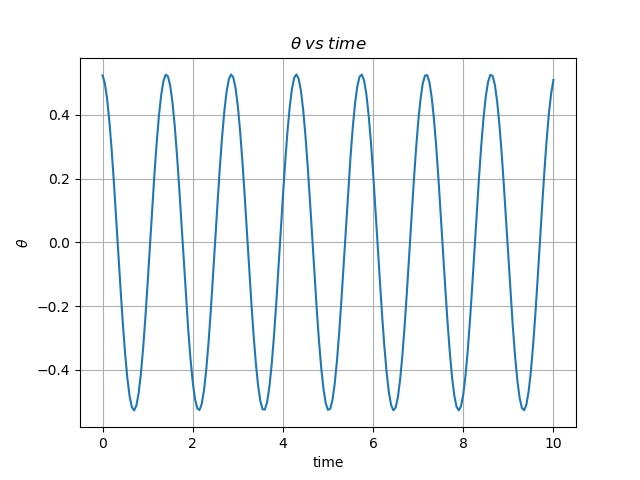

<IPython.core.display.Javascript object>


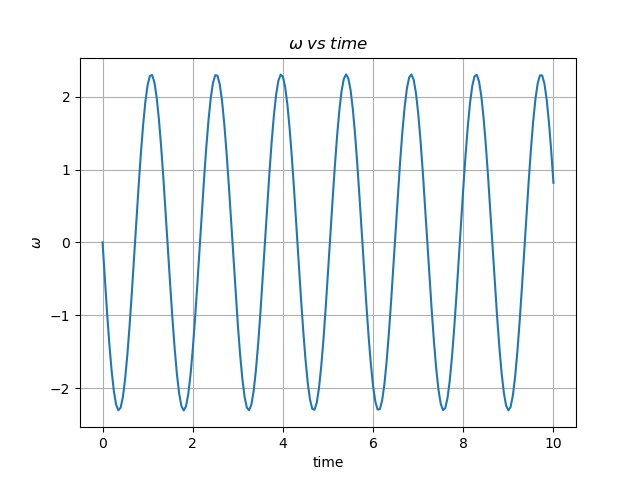

<IPython.core.display.Javascript object>


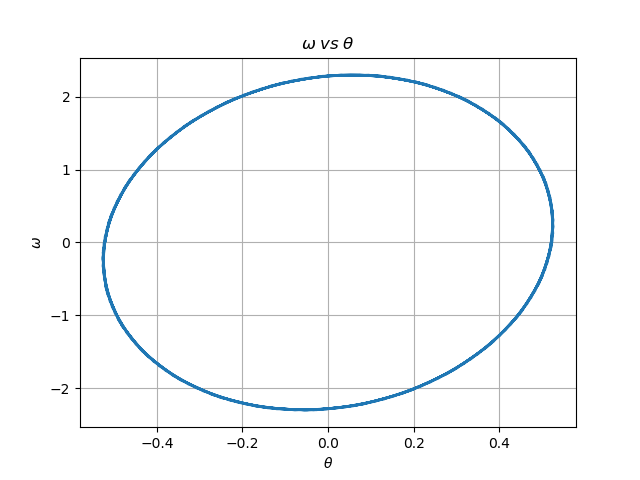

0

In [8]:
import matplotlib.pyplot as plt
Tay = pen()
Cro = pen(cromer=True)

def qp(fig, x, y, xlabel = "xlabel", ylabel = "ylabel", title = "Untitled"):
    plt.figure(fig)
    plt.plot(x, y)
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    return 0
    
def all3(a, f):
    qp(f, a[0], a[1], "time", r'$\theta$', r'$\theta\;vs\;time$')
    qp(f+1, a[0], a[2], "time", r'$\omega$', r'$\omega\;vs\;time$')
    qp(f+2, a[1], a[2], r'$\theta$', r'$\omega$', r'$\omega\;vs\;\theta$')
    return 0

all3(Tay, 0)
all3(Cro, 3)

Explore the stability of the two integrators. First, use cromer=False in the parameters and execute. Plot the solutions obtained at time 100s for both methods. 




<IPython.core.display.Javascript object>


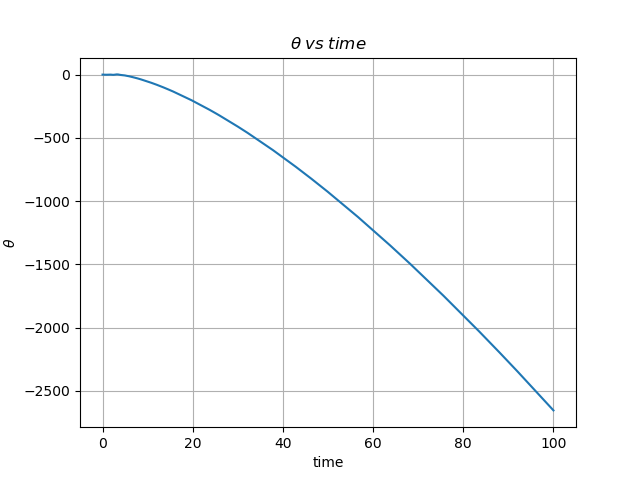

<IPython.core.display.Javascript object>


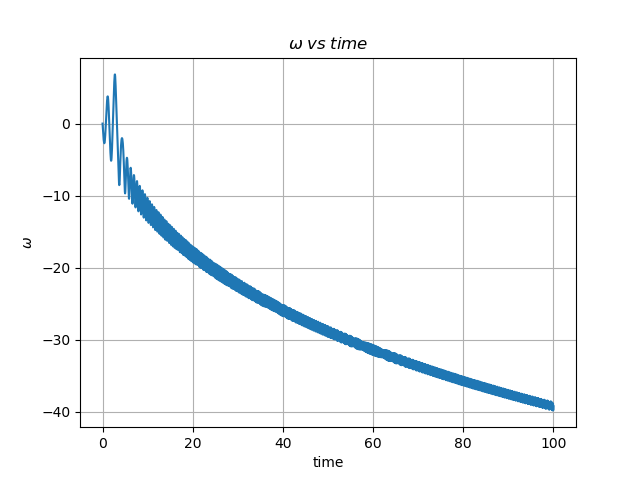

<IPython.core.display.Javascript object>


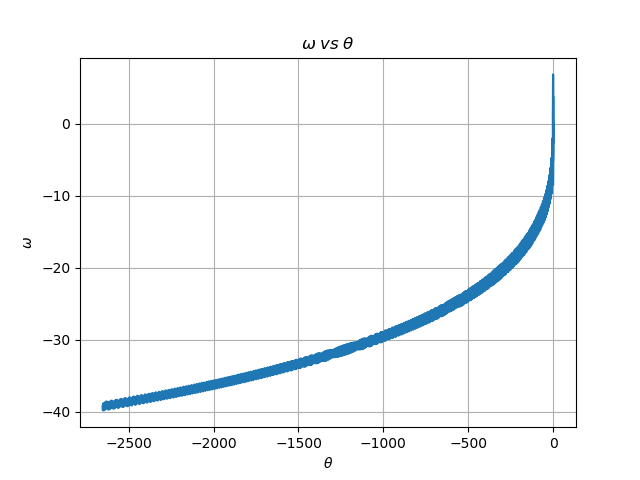

0

In [13]:
tstart = 0
tend = 100
all3(pen(cromer = False), 6)

Start from the vertical position (pendulum pointing upward). What solution do you expect? Does your function provide a realistic solution? 




<IPython.core.display.Javascript object>


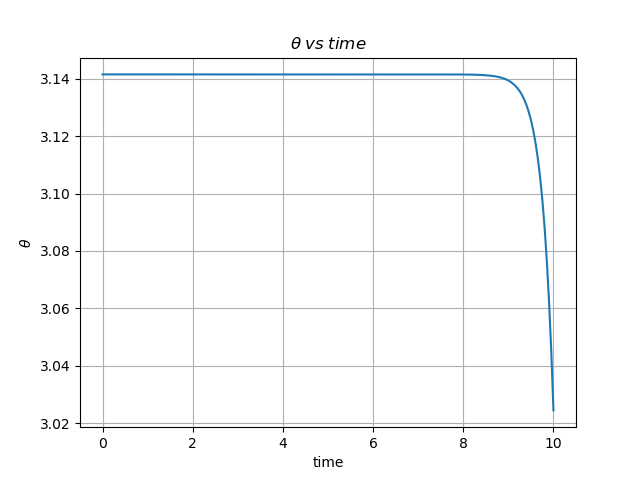

<IPython.core.display.Javascript object>


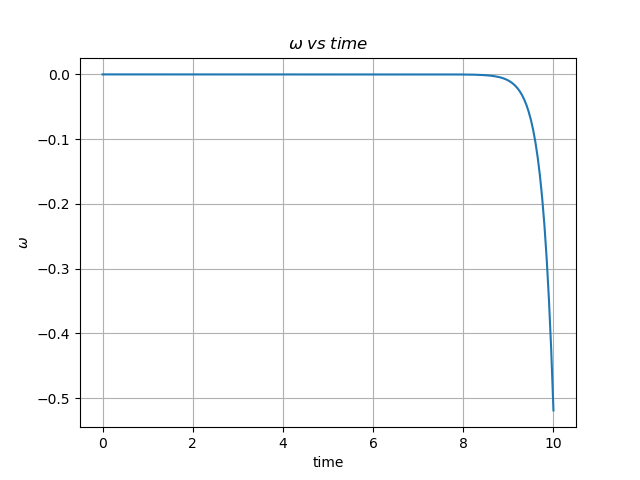

<IPython.core.display.Javascript object>


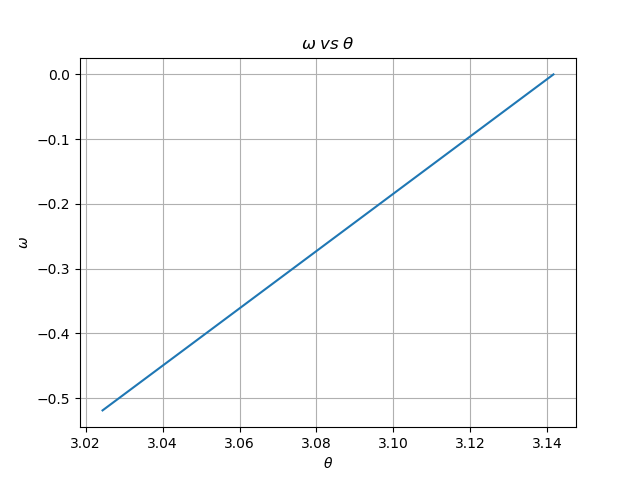

0

In [50]:
import math
all3(pen(omega0=0, theta0=math.pi), 9)

<IPython.core.display.Javascript object>


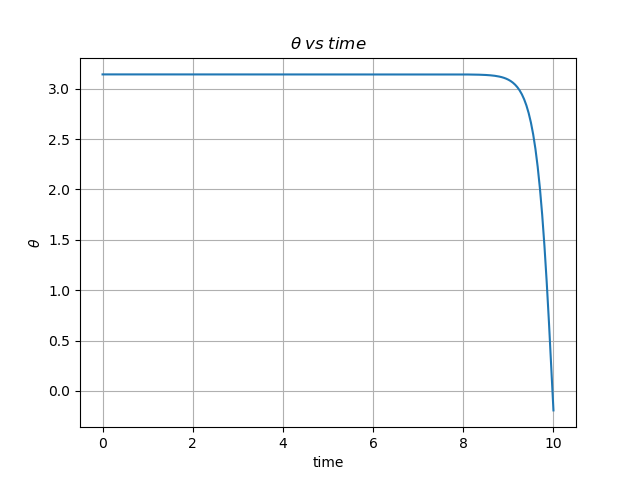

<IPython.core.display.Javascript object>


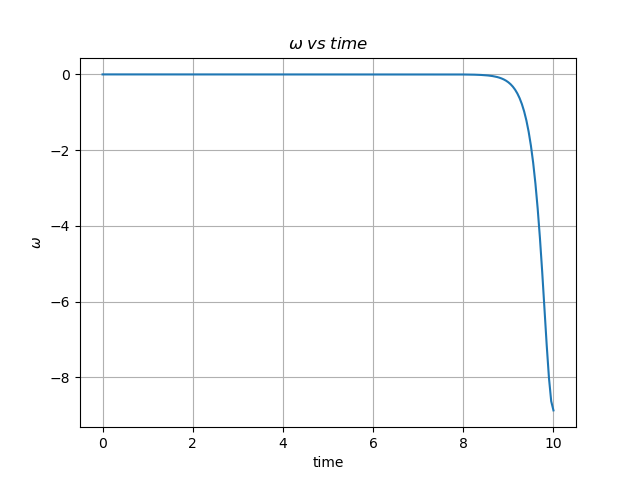

<IPython.core.display.Javascript object>


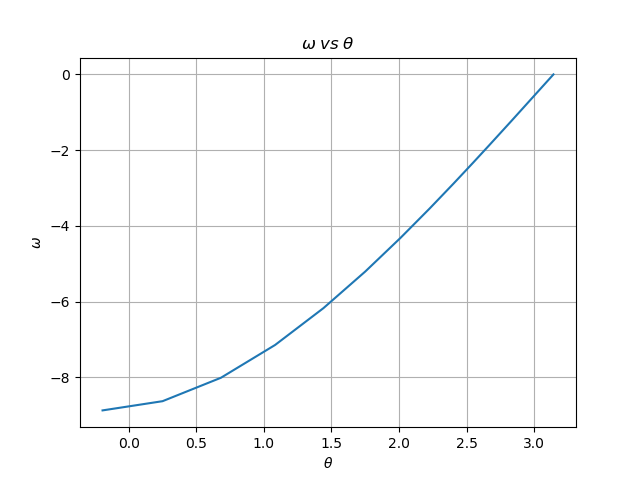

0

In [51]:
all3(pen(cromer = True, omega0=0, theta0=math.pi), 12)


Now, modify the pendulum function to account for a friction force. Friction is generally obtained in mechanics by a force opposite to the direction of displacement, and with an amplitude proportional to the velocity. 

As the pendulum has an angular velocity, the friction force is along the tangent 
and proportional to $\omega$ : 


$\frac{d \omega}{dt}  = -\frac{g}{l} sin( \theta ) - \alpha * \omega $ 

Where $\alpha$ is the friction constant. 








Question: which is true,

- $\alpha>0$ TRUE
- $\alpha<0$

Question: what is the friction ($\alpha$) necessary to bring the pendulum to a complete stop within the 10s time interval? 

In [48]:
tend = 10
#all3(pen(cromer = True, dampen = 0.1),15)

from IPython.display import display, Math

def info(cro,ii):
    print(ii)
    th = cro[1][len(cro[1])-1]
    om = cro[2][len(cro[2])-1]
    display(Math(r'\theta' ":" r'{}'.format(th)))
    display(Math(r'\omega' ":" r'{}'.format(om)))    
    print("time:", pen()[0][len(cro[0])-1])
    return 0

a = np.arange(-0.01,0.1, 0.001)
o = np.zeros(len(a))

helpme = 0
for i in a:
    cro = pen(cromer = True, dampen = i)
    #o[int((abs(a[0])+i)/abs(a[1]-a[0]))] = cro[2][len(cro[2])-1]
    o[helpme] = cro[2][len(cro[2])-1]
    helpme+=1
    #info(cro,i)
    


<IPython.core.display.Javascript object>


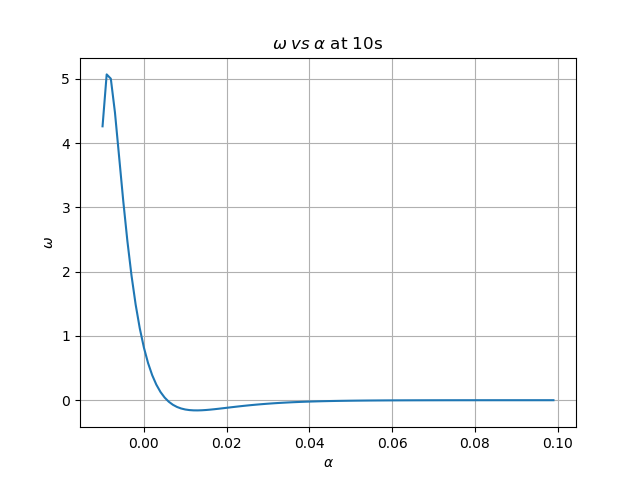

Text(0.5, 1.0, '$\\omega\\;vs\\;\\alpha$ at 10s')

In [49]:
plt.figure(18)
plt.plot(a, o)
plt.grid()
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\omega$')
plt.title(r'$\omega\;vs\;\alpha$ at 10s')    